# Alissa Beaderstadt: Exploratory Data Analysis Project

Author: Alissa Beaderstadt

Purpose: Implement Jupyter Notebook to perform exploratory data analysis (EDA) using pandas and other tools. We will use the Seaborn library to load the Iris dataset.

Date: 02-03-2025

Welcome to my notebook! In this project, I'll be diving into the Iris dataset, a classic in data analysis. The main goal is to explore the data, spot any patterns, and identify key features that can help us tell the three Iris species Setosa, Versicolor, and Virginica apart.

Throughout this notebook, I'll be working with libraries like Pandas, Seaborn, and Matplotlib to load, visualize, and analyze the data. By the end, we will have a clearer idea of which features are most useful for distinguishing between the species, and we will go through some cool visualizations that’ll help us make sense of it all.

Let’s jump into this analysis!

# 1. Imports
Below are the necessary imports for this notebook:


In [99]:
import pandas as pd
import seaborn as sns
import matplotlib 

# Axes object (basic plot type returned by Seaborn)
from matplotlib.axes import Axes

# 2. Load Data
Loading the Iris dataset from the Seaborn Library:

In [100]:
# Load the Iris dataset into pandas DataFrame
iris_df: pd.DataFrame = sns.load_dataset('iris')

# List column names
iris_df.columns

# Inspect first few rows of the DataFrame
iris_df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 3. Initial Data Exploration
Getting familiar with the dataset's format, size, and the type of information each column holds:

In [101]:
# Specify the number of rows to display
iris_df.head(10)

# Inspect the shape of the DataFrame with shape attribute
# The shape is a tuple with count of rows and columns in the DataFrame
iris_df.shape

# Inspect the data types of the columns with dtypes attribute
# The data types are returned as a pandas Series
iris_df.dtypes

# Inspect the data types of the columns with info() method
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# 4. Initial Descriptive Statistics
Use the DataFrame describe() method to obtain a statistical summary of the numerical columns:

In [102]:
# Inspect summary statistics for numerical columns
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 5a. Initial Data Distribution for Numerical Columns
To show histograms for ALL numerical columns, we can use hist():

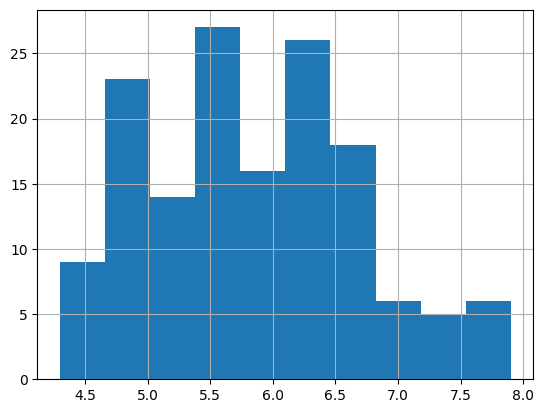

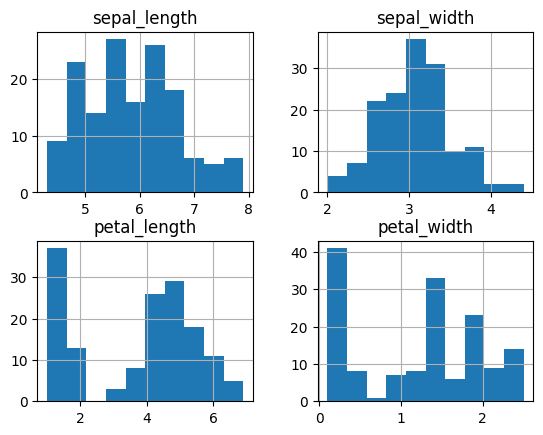

In [103]:
# Inspect histogram by one numerical column
iris_df['sepal_length'].hist()

# Inspect histograms for ALL numerical columns
iris_df.hist()

# Show all plots
matplotlib.pyplot.show()

***Observations :***
- Based on the above histograms we can see that sepal_width has the most even distribution and most closely represents a bell curve.
- sepal_lenth has the second most even distribution.
- The petal_length and petal_width histograms each show distinct peaks in the lower range, between 0 and 2.

# 5b. Initial Data Distribution for Categorical Columns

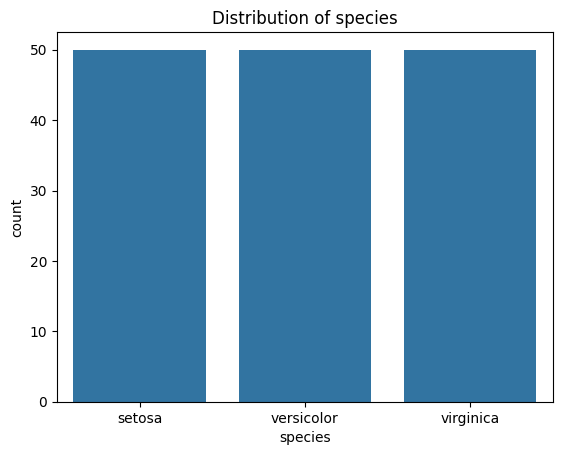

In [104]:
# Inspect value counts by categorical column
# Column name must be EXACT.
# The value_counts() method is only available for Series objects.
# The value_counts() method returns a pandas Series with the counts of unique values in the column.
iris_df['species'].value_counts()

# Inspect value counts for ALL categorical columns
for col in iris_df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=iris_df)
    matplotlib.pyplot.title(f'Distribution of {col}')
    matplotlib.pyplot.show()

# Show all plots
matplotlib.pyplot.show()

***Observations :***
The distribution of the three different species is equal.

# 6. Initial Data Transformation and Feature Engineering
This phase of data preparation or preprocessing involves both cleaning and transforming the data for analysis:

In [105]:
# Feature Engineering
# Renaming all columns
iris_df.rename(columns={'sepal_length': 'Sepal Length', 'sepal_width': 'Sepal Width', 
                        'petal_length': 'Petal Length', 'petal_width': 'Petal Width'}, inplace=True)

# Adding new columns
iris_df['Sepal Area'] = iris_df['Sepal Length'] * iris_df['Sepal Width']
iris_df['Pepal Area'] = iris_df['Petal Length'] * iris_df['Petal Width']


# 7. Initial Visualizations
This involves using appropriate chart types to extract and present insights from the data:

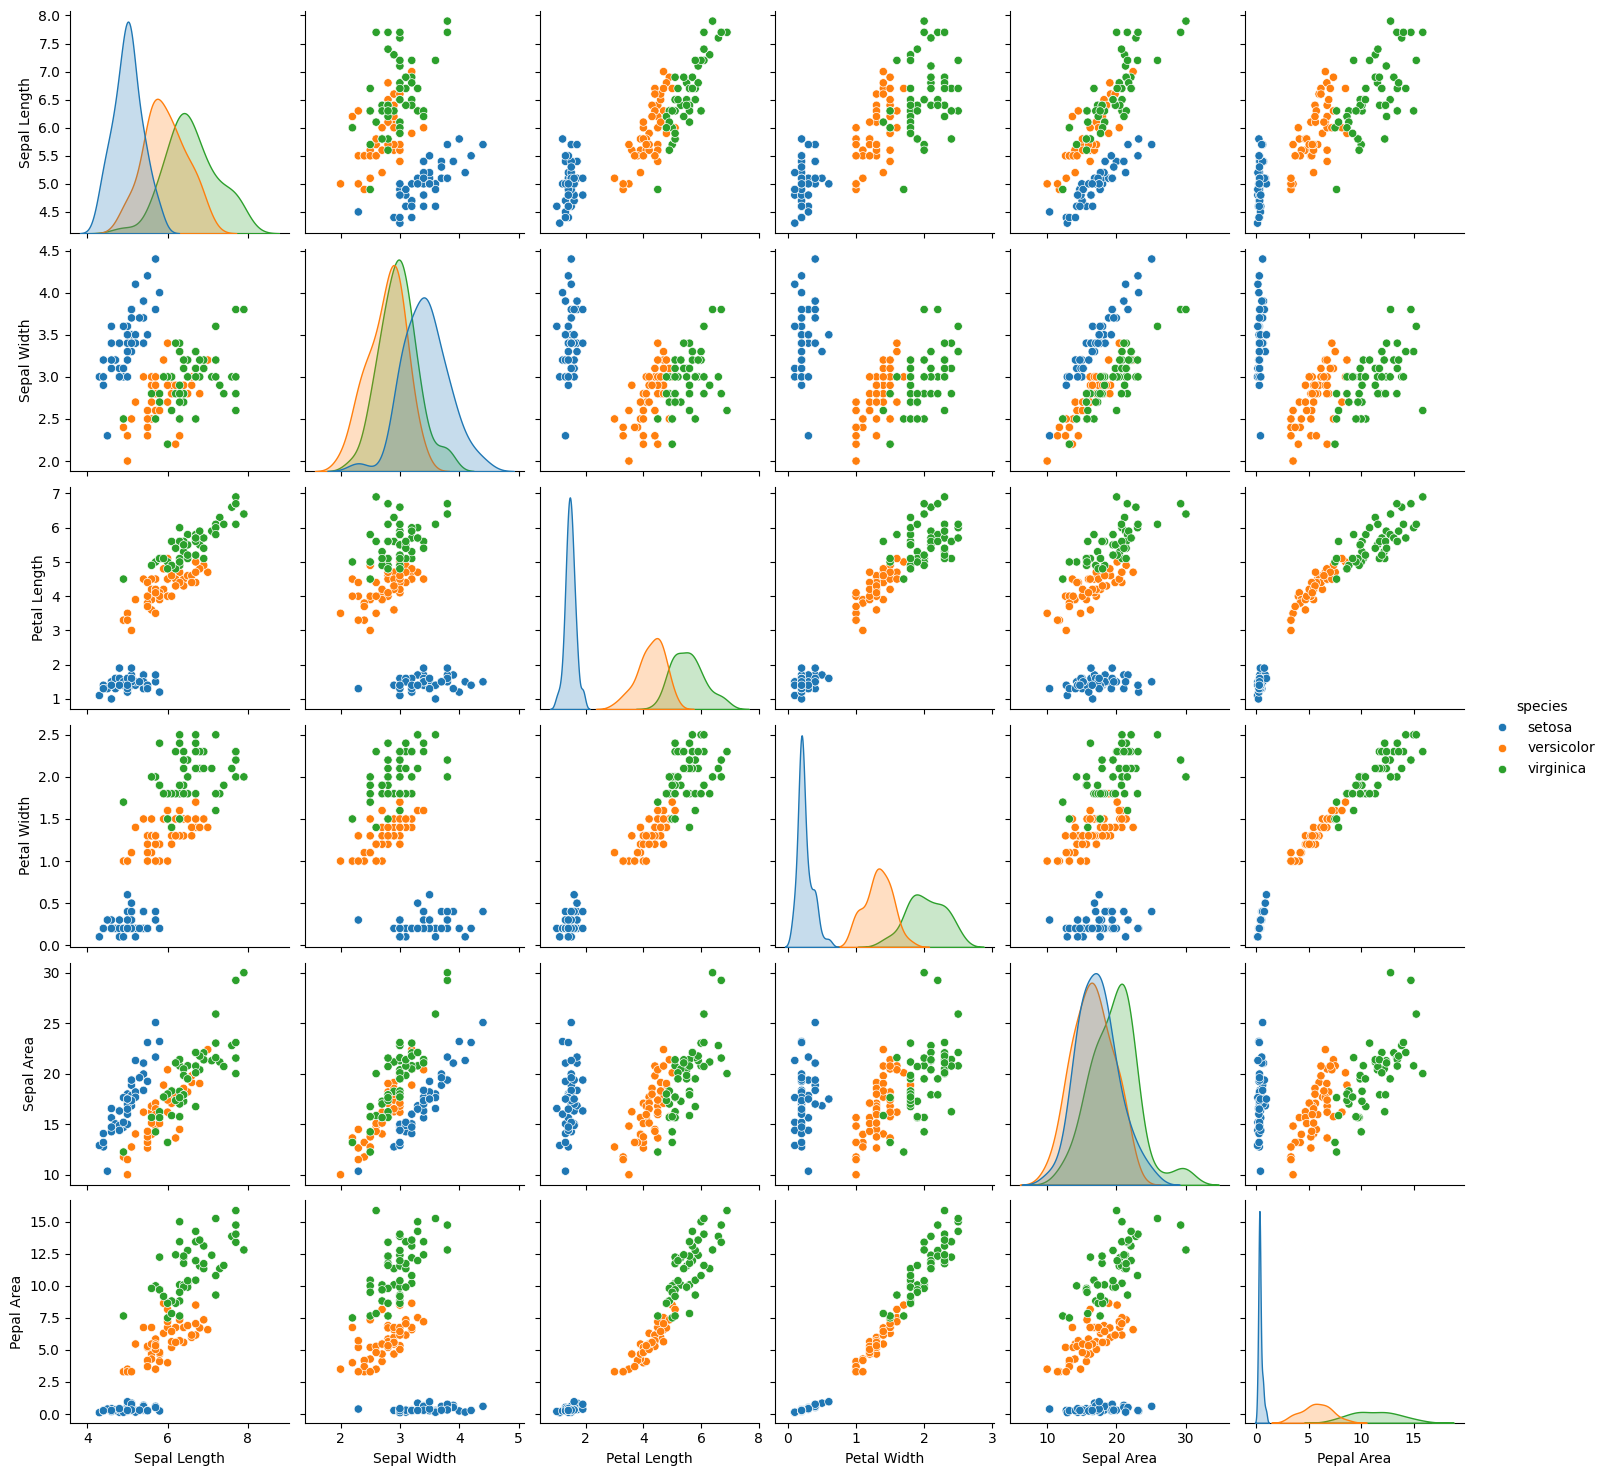

In [106]:
# Create a pairplot of the Iris dataset
# A pairplot is a grid of scatter plots for each pair of numerical columns in the dataset
# The hue parameter is used to color the data points 
# by species (a categorical column)
sns.pairplot(iris_df, hue='species')

# Show all plots
matplotlib.pyplot.show()

***Observations :***
- Versicolor and Virigina appear to follow similar trends in all catagories.
- Setosa follows a different trend in all plots, making it the most distinct of the species.
- Petal length vs. petal width displays a clear seperation between species, so it may be a strong differentiator.
- Petal length vs. petal width displays a linear trend.





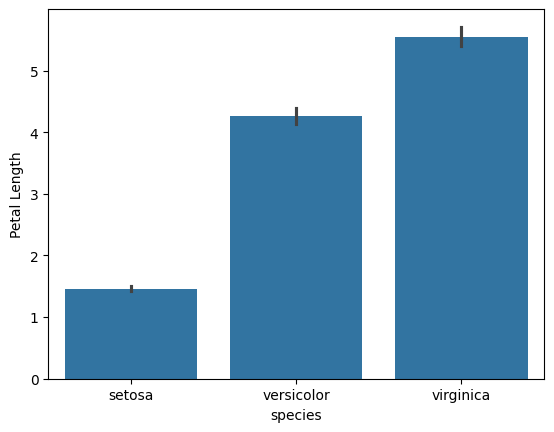

In [107]:
# Create a bar plot of the Iris dataset
# A bar plot is used to compare the average values of a feature across different species
# by species (a categorical column)
sns.barplot(x="species", y="Petal Length", data=iris_df)

# Show all plots
matplotlib.pyplot.show()

***Observations :***
- Petal length shows a clear distinction between species.
- Virginica has the largest petal length.
- Setosa has the smallest average petal length, with a noticeable gap between it and the other two species.

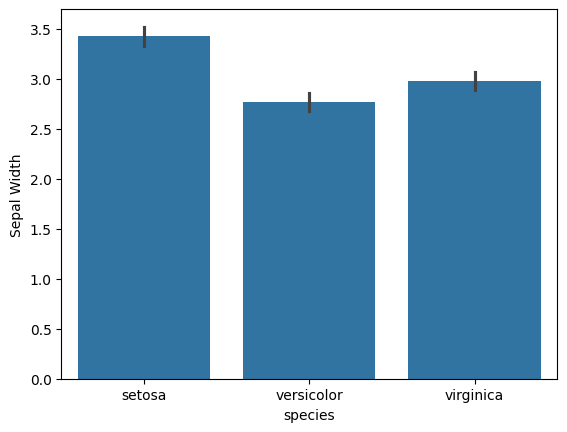

In [108]:
# Create a bar plot of the Iris dataset
# A bar plot is used to compare the average values of a feature across different species
# by species (a categorical column)
sns.barplot(x="species", y="Sepal Width", data=iris_df)

# Show all plots
matplotlib.pyplot.show()

***Observations :***
- The bar plot shows that the average sepal width for the three species does not differ as dramatically as it does for other features (like petal length shown above). 
- Sepal width is not a strong species differentiator.
- The bars for versicolor and virginica are quite similar, with only a small difference between their average sepal widths.

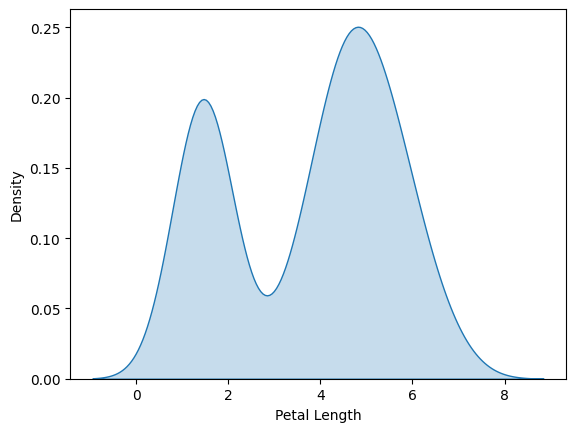

In [109]:
# Create a KDE plot of the Iris dataset
# A KDE plot is used to estimate the probability density function of a feature 
sns.kdeplot(iris_df['Petal Length'], fill=True)

# Show all plots
matplotlib.pyplot.show()

***Observations :***
- Petal Length has a bimodal distribution, with two prominent clusters of petal lengths that might correspond to two species with distinct petal sizes.
- The KDE plot shows that Petal Length may be a good differentiator for the species.

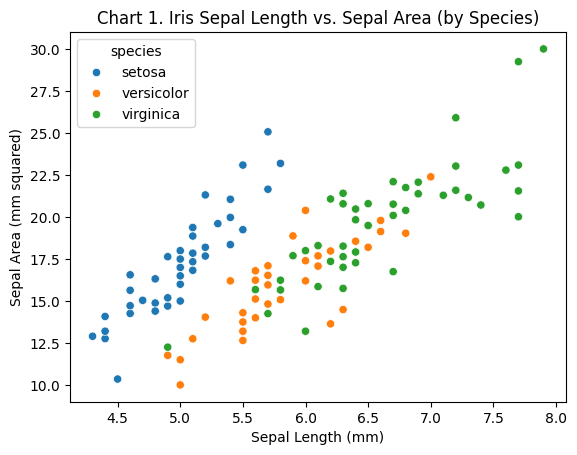

In [110]:
# A scatter plot is a plot of two numerical variables.
scatter_plt: Axes = sns.scatterplot(
    data=iris_df, x="Sepal Length", y="Sepal Area", hue="species"
)

# Set axis labels using the Matplotlib Axes methods set_xlabel() and set_ylabel()
scatter_plt.set_xlabel("Sepal Length (mm)")
scatter_plt.set_ylabel("Sepal Area (mm squared)")   

# Set the title using the Matplotlib Axes set_title() method
scatter_plt.set_title("Chart 1. Iris Sepal Length vs. Sepal Area (by Species)")

matplotlib.pyplot.show()

***Observations :***
- The scatter plot shows a general positive trend between sepal length and sepal area.
- setosa has a smaller sepal length, as seen by their clustering in the left part of the plot. This makes Setosa distinct from the other two species.
- Versicolor and Virginica show considerable overlap in their sepal length and area, so these features are not as useful for distinguishing between these two species.

# 8. Initial Insights
From the visualizations and the exploratory analysis in this notebook, I found that the distribution of the three Iris species is equal. This makes it easy to compare them. When it comes to distinguishing between species, Petal Length stands out as a strong feature. The first bar plot shows that Setosa has the shortest petal length, while Virginica has the longest. This creates a clear separation between the species, making Petal Length a useful feature for classification. This is further confirmed in the and the KDE plot. On the other hand, Sepal Width doesn’t do much to differentiate the species. The bar plot reveals that the average Sepal Width for each species is fairly similar, with only a small difference between Versicolor and Virginica. This means it’s not a strong feature for distinguishing between them. Overall, features like Sepal Width and Sepal Area have limited ability to separate Versicolor and Virginica, which highlights the need to choose the right features for accurate classification.